In [201]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd                              
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 10,6



In [152]:
nce = pd.read_excel('Files\\SABRE NCe Data.xlsx', sheet_name='SABRE 2019 Data')
#Parse string to datetime type
nce['Date Opened'] = nce['Date Opened'].dt.strftime('%Y-%m')
nce['Date Opened'] = pd.to_datetime(nce['Date Opened'], infer_datetime_format = True, format='%Y%m')
analysis = nce[['Date Opened','NCe']]
#print(analysis.head(5))
df = analysis.groupby('Date Opened', as_index=False).count()
#df = analysis.groupby('Date Opened', as_index=False).count()
#print(df.head(5))
indexedNce = df.set_index(['Date Opened'])
print(df)



   Date Opened  NCe
0   2019-01-01   85
1   2019-02-01   72
2   2019-03-01   51
3   2019-04-01   96
4   2019-05-01   84
5   2019-06-01   81
6   2019-07-01   71
7   2019-08-01   58
8   2019-09-01   82
9   2019-10-01   84
10  2019-11-01   72
11  2019-12-01   77


In [153]:
from datetime import datetime
indexedNce.head(5)

,NCe
Date Opened,
2019-01-01,85
2019-02-01,72
2019-03-01,51
2019-04-01,96
2019-05-01,84


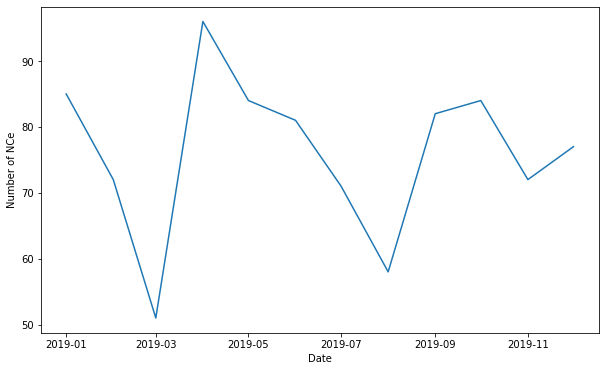

In [154]:
## Plot Graph

plt.xlabel('Date')
plt.ylabel('Number of NCe')
plt.plot(indexedNce)

In [155]:
#Determining Rolling Statistics

rolmean = indexedNce.rolling(window = 4).mean()
rolstd = indexedNce.rolling(window = 4).std()
print(rolmean, rolstd)


               NCe
Date Opened       
2019-01-01     NaN
2019-02-01     NaN
2019-03-01     NaN
2019-04-01   76.00
2019-05-01   75.75
2019-06-01   78.00
2019-07-01   83.00
2019-08-01   73.50
2019-09-01   73.00
2019-10-01   73.75
2019-11-01   74.00
2019-12-01   78.75                    NCe
Date Opened           
2019-01-01         NaN
2019-02-01         NaN
2019-03-01         NaN
2019-04-01   19.339080
2019-05-01   19.189841
2019-06-01   19.131126
2019-07-01   10.295630
2019-08-01   11.733144
2019-09-01   11.165423
2019-10-01   11.954776
2019-11-01   11.888370
2019-12-01    5.377422


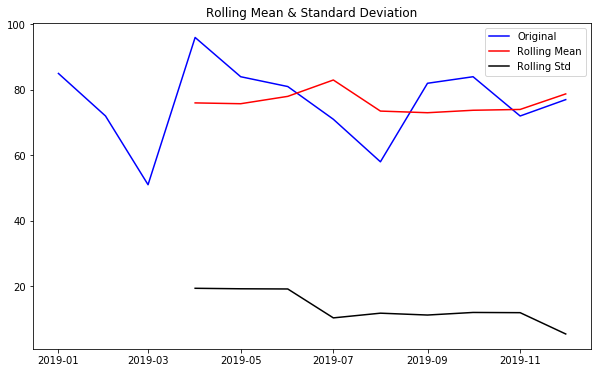

In [156]:
#Plot Rolling Statistics

orig = plt.plot(indexedNce, color = 'blue',label = 'Original')
mean = plt.plot(rolmean,color = 'red',label = 'Rolling Mean')
std = plt.plot(rolstd ,color = 'black',label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)


In [157]:

#Performing Dickey-Fuller Test

from statsmodels.tsa.stattools import adfuller

dftest = adfuller(indexedNce['NCe'], autolag = 'AIC')
dfoutput = pd.Series(dftest[0:4], index = ['Test-Statistics', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

Test-Statistics               -0.649722
p-value                        0.859347
#Lags Used                     4.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64


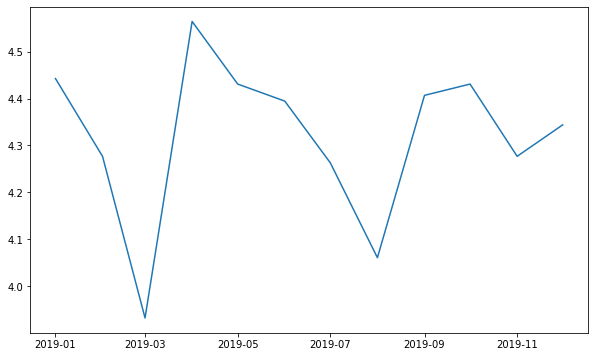

In [129]:
#Estimate Trend
# 1. Log Scale

indexedNce_logScale = np.log(indexedNce)
plt.plot(indexedNce_logScale)


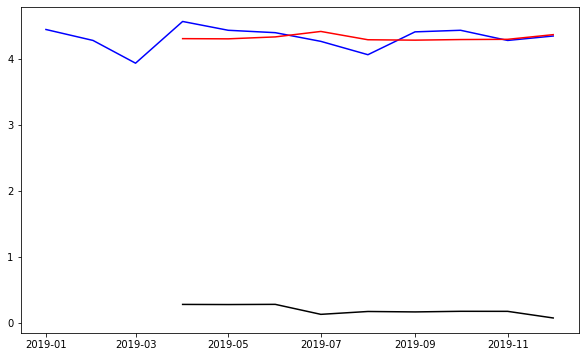

In [158]:
movingAvg = indexedNce_logScale.rolling(window = 4).mean()
movingStd = indexedNce_logScale.rolling(window = 4).std()
plt.plot(indexedNce_logScale, color = 'blue',label = 'Original Log')
plt.plot(movingAvg, color = 'red',label = 'Rolling Mean')
plt.plot(movingStd, color = 'black',label = 'Rolling Std')


In [159]:
datasetLogScaleMinusMovingAvg = indexedNce - movingAvg
datasetLogScaleMinusMovingAvg.head(12)

#Remove NaN values.
datasetLogScaleMinusMovingAvg.dropna(inplace = True)
datasetLogScaleMinusMovingAvg.head(10)



,NCe
Date Opened,
2019-04-01,91.696127
2019-05-01,79.699086
2019-06-01,76.669640
2019-07-01,66.586926
2019-08-01,53.712903
2019-09-01,77.718927
2019-10-01,79.709835
2019-11-01,67.706339
2019-12-01,72.635498


In [160]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determining Rolling Statistics
    movingAvg = timeseries.rolling(window = 4).mean()
    movingStd = timeseries.rolling(window = 4).std()
    #print(rolmean, rolstd)


    #Plot Rolling Statistics
    orig = plt.plot(timeseries,color = 'blue',label = 'Original')
    mean = plt.plot(movingAvg,color = 'red',label = 'Rolling Mean')
    std = plt.plot(movingStd,color = 'black',label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Performing Dickey-Fuller Test
    print('Results of Dickey-Fuller Test ...')
    dftest = adfuller(timeseries['NCe'], autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test-Statistics', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)


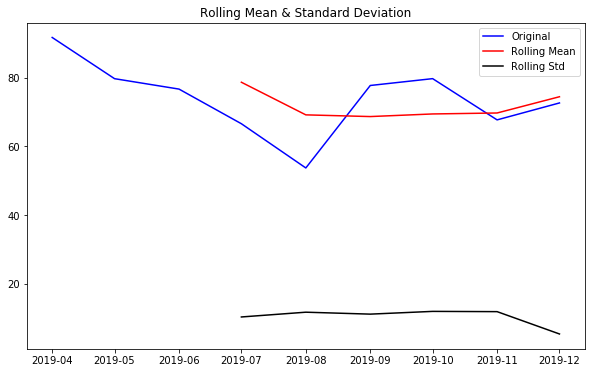

Results of Dickey-Fuller Test ...
Test-Statistics               -2.266086
p-value                        0.183139
#Lags Used                     1.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64


In [161]:
test_stationarity(datasetLogScaleMinusMovingAvg)


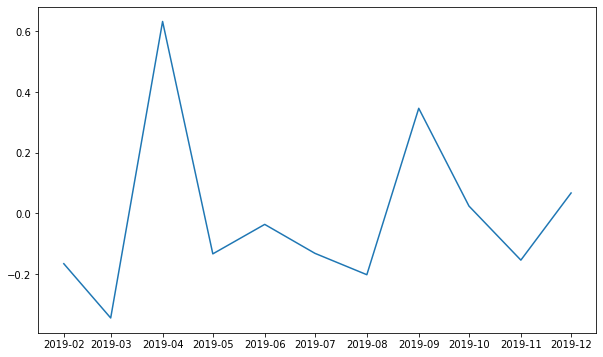

In [162]:
datasetLogDiffShifting = indexedNce_logScale - indexedNce_logScale.shift()
plt.plot(datasetLogDiffShifting)

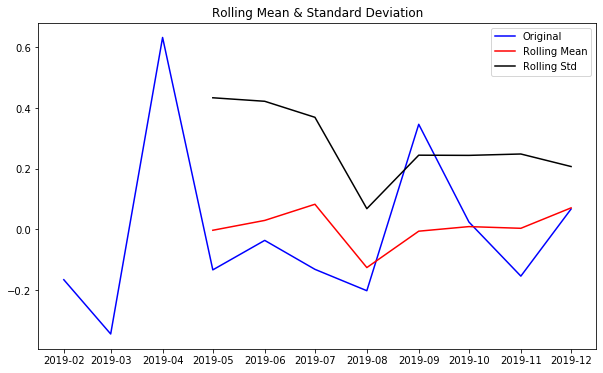

Results of Dickey-Fuller Test ...
Test-Statistics               -6.308001e+00
p-value                        3.287129e-08
#Lags Used                     3.000000e+00
Number of Observations Used    7.000000e+00
Critical Value (1%)           -4.938690e+00
Critical Value (5%)           -3.477583e+00
Critical Value (10%)          -2.843868e+00
dtype: float64


In [23]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

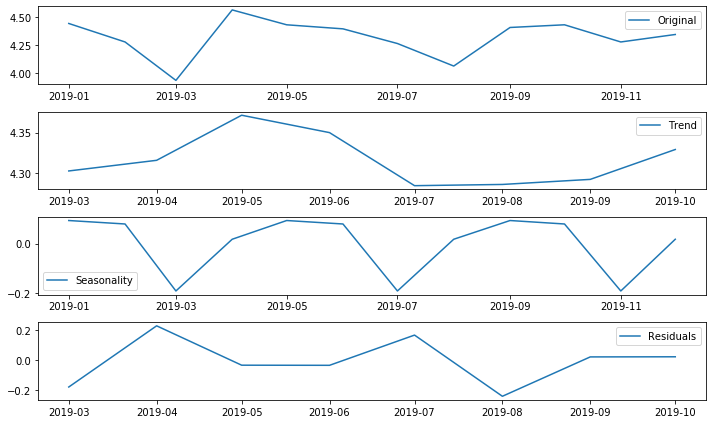

In [163]:
# Components of Time Series

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedNce_logScale, freq=4)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedNce_logScale, label = 'Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc='best')
plt.tight_layout()


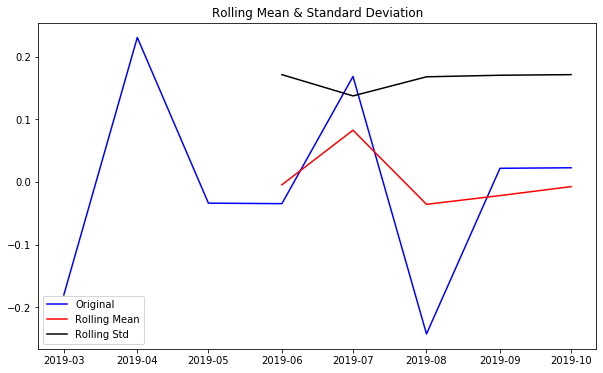

Results of Dickey-Fuller Test ...
Test-Statistics                0.009891
p-value                        0.959342
#Lags Used                     2.000000
Number of Observations Used    5.000000
Critical Value (1%)           -6.045114
Critical Value (5%)           -3.929280
Critical Value (10%)          -2.986810
dtype: float64


In [25]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

In [165]:
datasetLogDiffShifting

,NCe
Date Opened,
2019-01-01,NaN
2019-02-01,-0.165985
2019-03-01,-0.344840
2019-04-01,0.632523
2019-05-01,-0.133531
2019-06-01,-0.036368
2019-07-01,-0.131769
2019-08-01,-0.202237
2019-09-01,0.346276


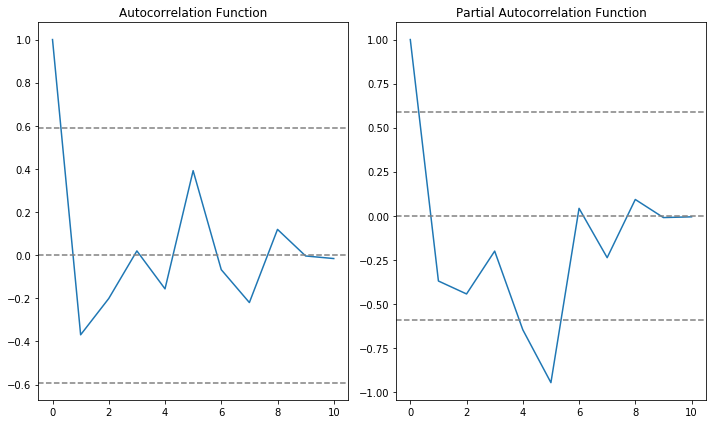

In [166]:
#ACF and #PACF Graphs

from statsmodels.tsa.stattools import acf, pacf
datasetLogDiffShifting.dropna(inplace=True)
lag_acf = acf(datasetLogDiffShifting, nlags = 10)
lag_pacf = pacf(datasetLogDiffShifting, nlags = 10, method = 'ols')

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--',color='gray')
plt.title('Autocorrelation Function')


#Plot PACF

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR Model
6.452428429848869


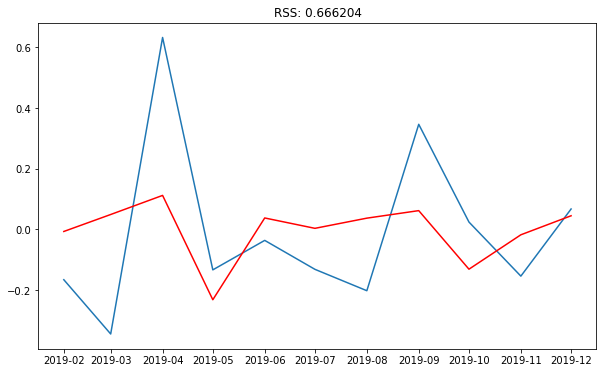

In [175]:
from statsmodels.tsa.arima_model import ARIMA

#AR Model
model = ARIMA(indexedNce_logScale, order=(1,1,0))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting['NCe'])**2))
print('Plotting AR Model')
print(results_AR.aic)

C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting MA Model
1.3850068475490644


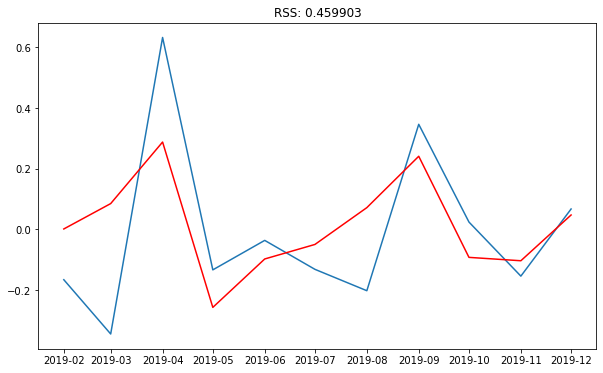

In [174]:
#MA model

model = ARIMA(indexedNce_logScale, order=(0,1,1))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting['NCe'])**2))
print('Plotting MA Model')
print(results_MA.aic)

In [176]:
import itertools
p=d=q=range(0,10)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 0, 8),
 (0, 0, 9),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 1, 8),
 (0, 1, 9),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 2, 7),
 (0, 2, 8),
 (0, 2, 9),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 3, 7),
 (0, 3, 8),
 (0, 3, 9),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 4, 6),
 (0, 4, 7),
 (0, 4, 8),
 (0, 4, 9),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (0, 5, 6),
 (0, 5, 7),
 (0, 5, 8),
 (0, 5, 9),
 (0, 6, 0),
 (0, 6, 1),
 (0, 6, 2),
 (0, 6, 3),
 (0, 6, 4),
 (0, 6, 5),
 (0, 6, 6),
 (0, 6, 7),
 (0, 6, 8),
 (0, 6, 9),
 (0, 7, 0),
 (0, 7, 1),
 (0, 7, 2),
 (0, 7, 3),
 (0, 7, 4),
 (0, 7, 5),
 (0, 7, 6),
 (0, 7, 7),
 (0, 7, 8),
 (0, 7, 9),
 (0, 8, 0),
 (0, 8, 1),
 (0, 8, 2),
 (0,

In [185]:
for param in pdq:
    try:
        model = ARIMA(indexedNce_logScale, order=param)
        results_ARIMA = model.fit(disp=-1)
        print(param, results_ARIMA.aic, sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['NCe'])**2))
    except:
        continue
# plt.plot(datasetLogDiffShifting)
# plt.plot(results_ARIMA.fittedvalues, color='red')
# plt.title('RSS: %4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['NCe'])**2))
# print('Plotting ARIMA Model')

C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


(0, 0, 0) -4.78076901887146 nan
(0, 0, 1) -7.602223589383087 nan
(0, 0, 2) -6.532489045107454 nan
(0, 1, 0) 5.990995509882486 0.7718367602237977
(0, 1, 1) 1.3850068475490644 0.4599026272661545
(0, 2, 0) 16.6647988193249 nan


C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anacond

(0, 2, 1) 11.065803450435286 nan
(1, 0, 0) -3.1098260170104055 nan


C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anacond

(1, 0, 1) -5.865559321620935 nan


C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anacond

(1, 0, 5) -1.9985437775731256 nan


C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3

(1, 0, 6) -4.691434731027357 nan
(1, 1, 0) 6.452428429848869 0.6662042957476625
(1, 1, 1) 3.294175620405831 0.4584211522633191


C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anacond

(1, 2, 0) 14.77784408052107 nan


C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


(1, 2, 5) 18.62165035387661 nan


C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3

(1, 2, 6) 24.137458507436907 nan
(2, 0, 0) -3.7699297737172657 nan


C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


(2, 0, 1) -7.236683361289721 nan


C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anacond

(2, 1, 0) 5.6567024287060335 0.5433765052793866


C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3

(2, 1, 1) 7.6823869865990275 0.5650420637835402


C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anacond

(2, 2, 0) 14.308227057499455 nan


C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anacond

(3, 0, 0) -4.139302378811784 nan


C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


(3, 0, 1) -7.563214383143475 nan


C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3

(3, 0, 4) -1.5844704930735887 nan


C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


(3, 0, 5) -2.3553725540373094 nan


C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anacond

(3, 1, 0) 6.722914285121831 0.5177449934568885


C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


(3, 1, 1) 9.133216402744118 0.5336555450576778


C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anacond

(3, 2, 0) 15.940036432785892 nan


C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anacond

(4, 0, 1) -9.653662078653582 nan


C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anacond

(4, 1, 5) 10.555891123636748 0.3751459662558755


C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuu

(4, 2, 1) 8.01208986709426 nan


C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anacond

(5, 0, 2) -5.138942110060057 nan


C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anacond

(5, 2, 1) 8.193428883809268 nan


C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


(5, 2, 2) 9.335301439453822 nan


C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3

(5, 2, 3) 10.257635653489103 nan
(6, 0, 2) -4.09576637073237 nan


C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


(6, 0, 3) -3.632169411281872 nan


C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3

(6, 0, 4) -2.34953072657256 nan


C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


(6, 1, 2) 0.10626511006418582 0.3697817465417375


C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3

(6, 1, 3) 2.1742553133057783 0.3707745308494631
(6, 2, 1) 10.188060820414222 nan


C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\pandepr\AppData\Local\Continuum\

(6, 2, 2) 11.0783096580832 nan


C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


(7, 0, 1) -9.963516340966535 nan
(7, 0, 2) -10.414500047109271 nan


C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3

(7, 0, 3) -6.265379134306215 nan
(7, 1, 1) -3.605761237011265 0.3883327630065765


C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3

(7, 1, 2) -1.2746484989922777 0.3993057258812572


C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3

(7, 2, 1) 9.697918607061126 nan


C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


(8, 0, 1) -10.507535923313128 nan


C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\

(8, 0, 2) -12.820652151270153 nan


C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\

(8, 1, 1) -0.4745767843399662 0.40727668072131884
(9, 0, 1) -9.025733424146381 nan


C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3

C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Plotting ARIMA Model


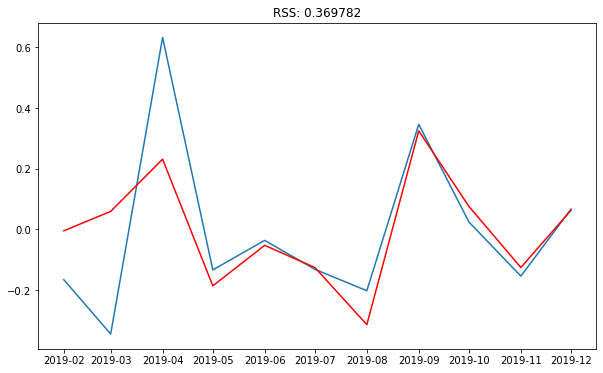

In [192]:
#ARIMA Model
model = ARIMA(indexedNce_logScale, order=(6,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['NCe'])**2))
print('Plotting ARIMA Model')

In [193]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff)

Date Opened
2019-02-01   -0.004744
2019-03-01    0.059251
2019-04-01    0.231273
2019-05-01   -0.186165
2019-06-01   -0.052636
2019-07-01   -0.125930
2019-08-01   -0.314040
2019-09-01    0.324821
2019-10-01    0.075475
2019-11-01   -0.125730
2019-12-01    0.063305
dtype: float64


In [194]:
#Convert to Cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

Date Opened
2019-02-01   -0.004744
2019-03-01    0.054507
2019-04-01    0.285780
2019-05-01    0.099615
2019-06-01    0.046978
2019-07-01   -0.078952
2019-08-01   -0.392992
2019-09-01   -0.068171
2019-10-01    0.007304
2019-11-01   -0.118426
2019-12-01   -0.055121
dtype: float64


In [195]:
predictions_ARIMA_log = pd.Series(indexedNce_logScale['NCe'].ix[0], index=indexedNce_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log

C:\Users\pandepr\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Date Opened
2019-01-01    4.442651
2019-02-01    4.437907
2019-03-01    4.497158
2019-04-01    4.728431
2019-05-01    4.542266
2019-06-01    4.489630
2019-07-01    4.363700
2019-08-01    4.049659
2019-09-01    4.374480
2019-10-01    4.449955
2019-11-01    4.324225
2019-12-01    4.387530
dtype: float64

Date Opened
2019-01-01     85.000000
2019-02-01     84.597718
2019-03-01     89.761694
2019-04-01    113.117921
2019-05-01     93.903340
2019-06-01     89.088436
2019-07-01     78.547183
2019-08-01     57.377889
2019-09-01     79.398559
2019-10-01     85.623071
2019-11-01     75.506986
2019-12-01     80.441500
dtype: float64
             NCe
Date Opened     
2019-01-01    85
2019-02-01    72
2019-03-01    51
2019-04-01    96
2019-05-01    84
2019-06-01    81
2019-07-01    71
2019-08-01    58
2019-09-01    82
2019-10-01    84
2019-11-01    72
2019-12-01    77


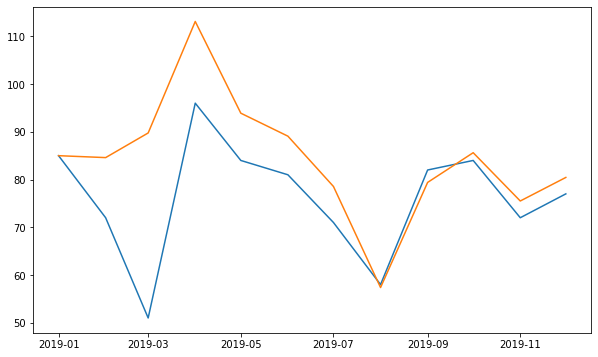

In [196]:
predictions_ARIMA=np.exp(predictions_ARIMA_log)
print(predictions_ARIMA)
print(indexedNce)
plt.plot(indexedNce)
plt.plot(predictions_ARIMA)
#predictions_ARIMA.head()

In [199]:
x=results_ARIMA.forecast(steps=12)
a = np.exp(x[0])
a

array([55.02129707, 80.59613223, 81.0742922 , 71.95422232, 72.03280978,
       58.22170752, 71.43668304, 85.85011363, 65.92521203, 73.48345587,
       56.12186442, 70.19198785])